# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_PATH = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_PATH = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_PATH = 'SpamData/03_Testing/prob-all-token.txt'

TEST_TARGET_PATH = 'SpamData/03_Testing/Test-target.txt'
TEST_FEATURES_MATRIX_PATH = 'SpamData/03_Testing/test-features.txt'


VOCAB_SIZE = 2500

# Load data

In [3]:
#load features
X_test = np.loadtxt(TEST_FEATURES_MATRIX_PATH, delimiter=' ')
#load target
y_test = np.loadtxt(TEST_TARGET_PATH, delimiter=' ')
# load tokens
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_PATH, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_PATH, delimiter=' ')
prob_all_token = np.loadtxt(TOKEN_ALL_PROB_PATH, delimiter=' ')

In [4]:
prob_all_token.shape

(2500,)

## Joint Probability

### the dot product

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
a.dot(b)

22

In [6]:
c = np.array([[0, 6],[3, 0],[5, 1]])
a.dot(c)

array([21,  9])

In [7]:
prob_token_spam.shape

(2500,)

In [8]:
X_test.shape

(1722, 2500)

In [9]:
X_test.dot(prob_token_spam)

array([0.42613505, 0.14221978, 0.14268358, ..., 0.57047217, 0.08768312,
       0.09774049])

In [10]:
# s = np.transpose(X_test)
# g = prob_token_spam *  s[:,0]
# g.sum()

## Set the prior

## $$ P(spam \, | \, token) =  \frac {P(token \, | \, spam)\,P(spam)} {P(token)}$$

In [11]:
prob_spam = 0.3113 #setting prior or guess from traning data probability of spam (from another notebook training_bayes_classifier)

In [12]:
np.log(prob_token_spam)

array([ -4.45111602,  -5.27816507,  -4.94296411, ..., -11.50470174,
       -11.50470174, -11.50470174])

In [13]:
prob_token_spam

array([1.16655408e-02, 5.10178361e-03, 7.13342273e-03, ...,
       1.00825763e-05, 1.00825763e-05, 1.00825763e-05])

In [14]:
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 4., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 0., 0.]])

## Joint Probability in log format

In [15]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_token)) + np.log(prob_spam)

In [16]:
joint_log_spam[:5]

array([19.39508558,  1.30901355, 18.43521523, 15.62368913, 18.47129161])

## Set the prior

## $$ P(ham \, | \, token) =  \frac {P(token \, | \, ham)\,P(ham)} {P(token)}$$

In [17]:
prob_ham = 1 - prob_spam
prob_ham

0.6887

In [18]:
joint_log_ham = X_test.dot(np.log(prob_token_ham)- np.log(prob_all_token)) + np.log(prob_ham)

In [19]:
joint_log_ham

array([-59.37172269, -11.09846991, -36.70749553, ...,  69.30131833,
         9.38683331,  -4.31624242])

## Checking for higher join Probability (Spam or not)

### $ P(Spam \, | \, X) > P(ham \, | \, X) $
<center>**OR**</center>
<br>

### $ P(Spam \, | \, X) < P(ham \, | \, X) $


In [20]:
%%time
# prediction = []
# for i in range(joint_log_spam.shape[0]):
#     if joint_log_ham[i] > joint_log_spam[i]:
#         prediction.append('0')
#     else:
#         prediction.append('1')

prediction = joint_log_ham < joint_log_spam

Wall time: 997 µs


In [21]:
prediction = prediction * 1

In [22]:
pd.Series(prediction).value_counts()

0    1165
1     557
dtype: int64

In [23]:
pd.Series(y_test).value_counts()

0.0    1134
1.0     588
dtype: int64

In [24]:
pd.DataFrame({'true_value': y_test, 'prediction': prediction})

,true_value,prediction
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
1717,0.0,0
1718,0.0,0
1719,0.0,0
1720,0.0,0


## Simplify

## $$ P(X \, | \, Spam) P(Spam) \neq  \frac {P(X \, | \, Spam)\,P(Spam)} {P(X)}$$

In [25]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(prob_spam)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(prob_ham)

<b><i> We can do this because P(x) cancel itself with both spam and ham probabiltiy having it. which doesn't mean we can do this but it is a unique trait here </i></b>

In [26]:
joint_log_spam, joint_log_ham

(array([-1224.86974643,  -263.81562476,  -413.66920673, ...,
        -4810.16578574,  -546.60960192,  -336.03045737]),
 array([-1303.63655471,  -276.22310822,  -468.81191749, ...,
        -4367.22858885,  -495.60282914,  -327.1899048 ]))

# Metrics and Evaluation

### Accuracy

In [27]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly: ', correct_docs)
numdocs_wrong = y_test.shape[0] - correct_docs
print('Docs classified wrongly: ', numdocs_wrong)

Docs classified correctly:  1673
Docs classified wrongly:  49


In [28]:
accuracy = correct_docs/len(X_test)
accuracy

0.9715447154471545

In [29]:
fraction_wrong = numdocs_wrong / len(X_test)
print('Fraction classified incorrectly {:.2%}'.format(fraction_wrong))
print('Fraction classified correctly {:.2%}'.format(accuracy))

Fraction classified incorrectly 2.85%
Fraction classified correctly 97.15%


## Visualising the Result

In [30]:
# label info
ylabel_info = 'P(X | Spam)'
xlabel_info = 'P(X | Nonspam)'
linedata = np.linspace(start=-12000, stop=1, num=1000)
linedata1 = np.linspace(start=-500, stop=250, num=1000)

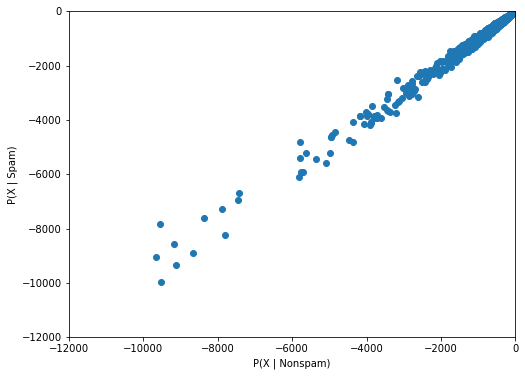

In [31]:
# plotting scatter plot
plt.figure(figsize=(8,6))
plt.xlabel(xlabel_info)
plt.ylabel(ylabel_info)

#set limit
plt.xlim([-12000,1])
plt.ylim([-12000,1])

plt.scatter(joint_log_ham, joint_log_spam)
plt.show()

## the decision boundary

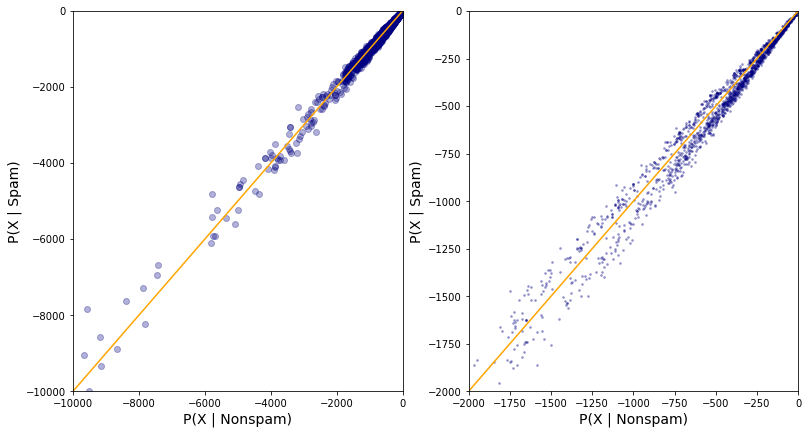

In [32]:
plt.figure(figsize=(13,7))

plt.subplot(1, 2, 1)
# plotting scatter plot
plt.xlabel(xlabel_info, fontsize=14)
plt.ylabel(ylabel_info, fontsize=14)

#set limit
plt.xlim([-10000,1])
plt.ylim([-10000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.3)
plt.plot(linedata, linedata, color='orange')


# char no. 2:
plt.subplot(1, 2, 2)

# plotting scatter plot
plt.xlabel(xlabel_info, fontsize=14)
plt.ylabel(ylabel_info, fontsize=14)

#set limit
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.3, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()


In [33]:
# chart syle
sns.set_style('whitegrid')
labels = 'Actual Category'
my_color = [ '#4E7989','#A9011B']

summary_df = pd.DataFrame({ylabel_info:joint_log_spam, xlabel_info:joint_log_ham, labels:y_test})

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


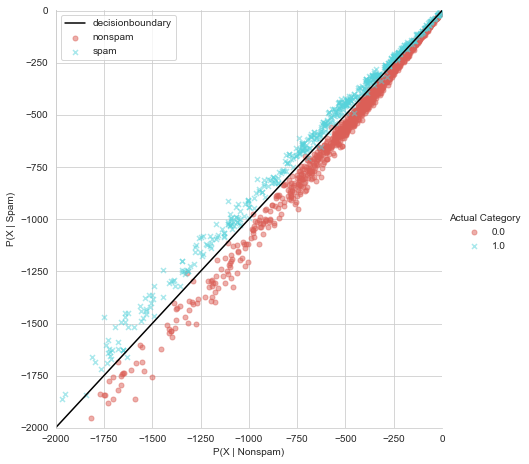

In [34]:
sns.lmplot(xlabel_info, ylabel_info, data=summary_df, fit_reg=False, height=6.5, scatter_kws={'alpha':0.5, 's':25}, hue=labels, markers=['o','x'], palette='hls')
plt.plot(linedata, linedata, color='black')

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.legend(( 'decisionboundary', 'nonspam', 'spam'))

plt.show()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


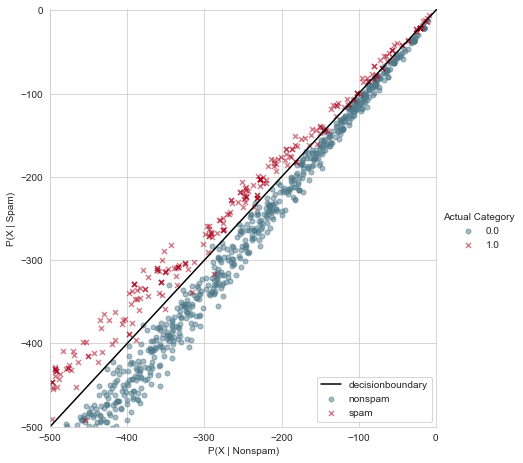

In [35]:
sns.lmplot(xlabel_info, ylabel_info, data=summary_df, fit_reg=False, height=6.5, scatter_kws={'alpha':0.5, 's':25}, hue=labels, markers=['o','x'], palette=my_color)
plt.plot(linedata, linedata, color='black')

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.legend(( 'decisionboundary', 'nonspam', 'spam'), loc='lower right')

plt.show()

## False positives and false negative

In [36]:
np.unique(prediction, return_counts=True)

(array([0, 1]), array([1165,  557], dtype=int64))

In [37]:
true_pos = (y_test == 1) & (prediction == 1) # here '&' is bitwiseAND operator

In [38]:
true_pos.sum() # this means 548 prediction were right, at both spam part 

548

In [78]:
false_pos = (y_test == 0) & (prediction == 1)

In [79]:
false_pos.sum() #this means 9 of the non-spam massages were classified as spam in prediction

9

In [80]:
false_neg = (y_test == 1) & (prediction == 0)

In [81]:
false_neg.sum() # this means 40 spam messages were classified as non-spam in prediction

40

## Recall score

In [83]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
print('The recall score is {:.2%}'.format(recall_score))

The recall score is 93.20%


## Precision score

In [84]:
precision_score = true_pos.sum()/(true_pos.sum() + flase_pos.sum())
print('The precision score is {:.2%}'.format(precision_score))

The precision score is 98.38%


## F-Score or F1 Score

In [85]:
f1_score = 2 * (precision_score * recall_score)/(precision_score + recall_score)
print('F score is {:.2%}'.format(f1_score))

F score is 95.72%
